In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import matplotlib
import numpy as np
import numpy.ma as ma

import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
#pd.set_option('html', False)
from IPython import display

#matplotlib
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import datetime
plt.rcParams.update({'font.size': 12})

from scipy.stats import stats

xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")
#months = {1:'jun', 2:'feb', 3:'mar',4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dic'}
path2datosVC = "../datos/dataframes_VC_contaminantes/cca/"

#months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'sep': '09', 'oct':'10', 'nov':'11', 'dic': '12'}

In [3]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dic']

In [4]:
MONTHS = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DIC']

In [5]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dic']

In [6]:
def E1or30(month):
    if month in ['jan', 'mar', 'may', 'jul', 'aug', 'oct', 'dic']:
        return 31
    elif  month in ['apr', 'jun', 'sep', 'jul', 'nov']:
        return 30
    elif month == 'feb':
        return 28

In [7]:
sum([5,6,7])

18

In [8]:
x_ticks = [0]
k = 0
for i, key in enumerate(months):
    print(key, E1or30(key))
    x_ticks.append(x_ticks[i] + E1or30(key))
x_ticks.pop(-1)

jan 31
feb 28
mar 31
apr 30
may 31
jun 30
jul 31
aug 31
sep 30
oct 31
nov 30
dic 31


365

In [9]:
x_ticks

[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

In [10]:
#field = 'pblh_24'
year = pd.DataFrame()

for key in months:
    #print(key)
    n_days = E1or30(key)
    month = pd.read_csv(path2datosVC+ key + '_vc_contaminantes_cca.csv', index_col=0)
    year = pd.concat([year, month])


In [11]:
o3_y = year['o3'].values.reshape(365, 24)
o3_y = ma.masked_where(np.isnan(o3_y.T), o3_y.T)

In [12]:
co_y = year['co'].values.reshape(365, 24)
co_y = ma.masked_where(np.isnan(co_y.T), co_y.T)

In [13]:
pm25_y = year['pm25'].values.reshape(365, 24)
pm25_y = ma.masked_where(np.isnan(pm25_y.T), pm25_y.T)

In [14]:
pblh_y = year['pblh_24'].values.reshape(365, 24)
pblh_y = ma.masked_where(np.isnan(pblh_y.T),pblh_y.T)

In [15]:
VC_y = year['VC_24'].values.reshape(365, 24)
VC_y = ma.masked_where(np.isnan(VC_y.T), VC_y.T)

In [16]:
u_mean_y = year['u_mean_24'].values.reshape(365, 24)
u_mean_y = ma.masked_where(np.isnan(u_mean_y.T), u_mean_y.T)

In [20]:
a = year

In [23]:
a.loc['o3', 'co']

KeyError: 'the label [o3] is not in the [index]'

In [20]:
x = np.linspace(1, 365, 365)
y = np.linspace(0, 23, 24)
xm, ym = np.meshgrid(x, y)

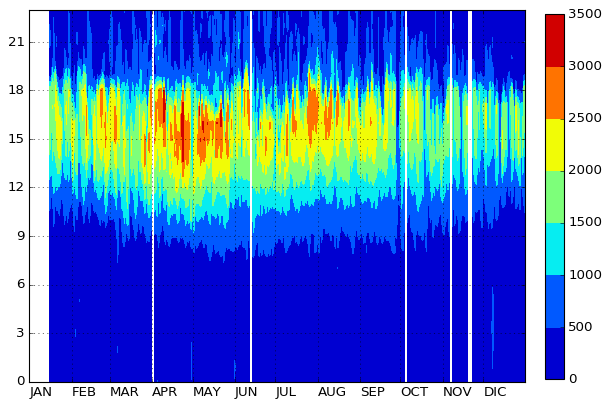

In [21]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, pblh_y)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

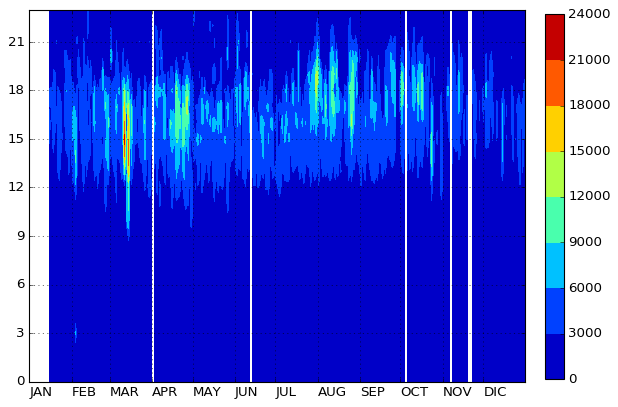

In [22]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, VC_y)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

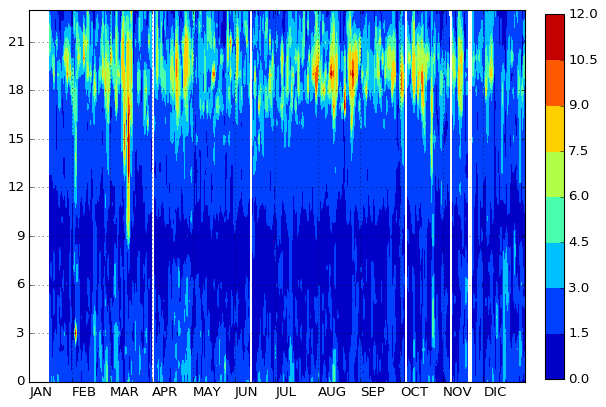

In [23]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, u_mean_y)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

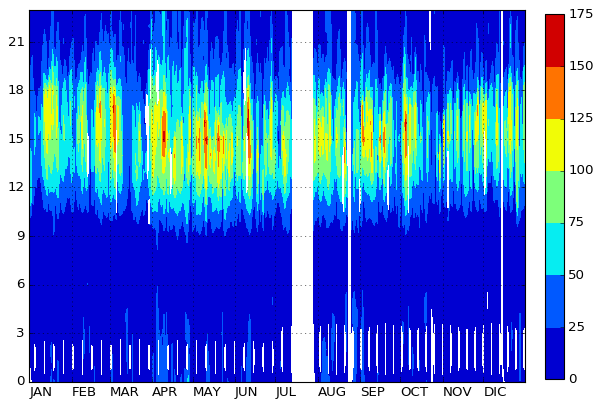

In [24]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, o3_y)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

# Ceilo

In [25]:
path2DataFrames = "/Users/claudiopierard/VC/datos/dataframes/cca/"

In [26]:
months

['jan',
 'feb',
 'mar',
 'apr',
 'may',
 'jun',
 'jul',
 'aug',
 'sep',
 'oct',
 'nov',
 'dic']

In [27]:
#field = 'pblh_24'
ceilo_y = pd.DataFrame()

for key in months:
    #print(key)
    n_days = E1or30(key)
    month = pd.read_csv(path2DataFrames+ key + '_dataframe_cca.csv', index_col=0)
    print(key, month.shape)
    ceilo_y = pd.concat([ceilo_y, month])


jan (744, 6)
feb (672, 6)
mar (744, 6)
apr (720, 6)
may (744, 6)
jun (720, 6)
jul (744, 6)
aug (744, 6)
sep (720, 6)
oct (744, 6)
nov (720, 6)
dic (744, 6)


In [28]:
ceilo_y.index = pd.to_datetime(ceilo_y.index)

In [29]:
raw_y = ceilo_y['Raw_mean'].values.reshape(365, 24).T
raw_y = ma.masked_where(np.isnan(raw_y), raw_y)

In [30]:
pblh_24_y = ceilo_y['PBLH_24'].values.reshape(365, 24).T
pblh_24_y = ma.masked_where(np.isnan(pblh_24_y), pblh_24_y)

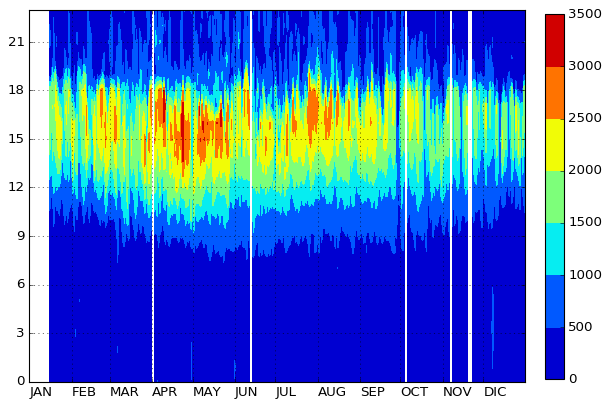

In [31]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, pblh_24_y)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

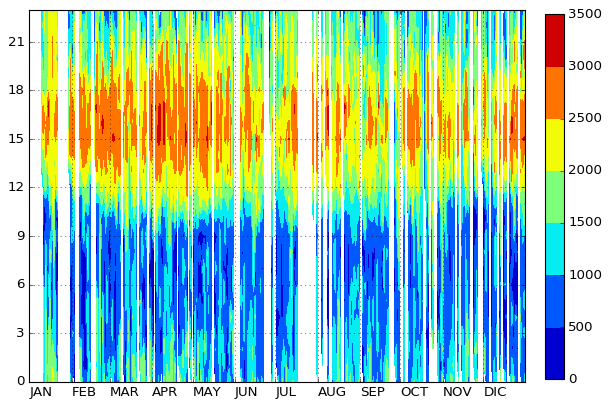

In [32]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, raw_y)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

In [33]:
raw_interp = interpolate.interp2d(xm, ym, raw_y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=96,96 m=8760 fp=nan s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


TypeError: float() argument must be a string or a number, not 'interp2d'

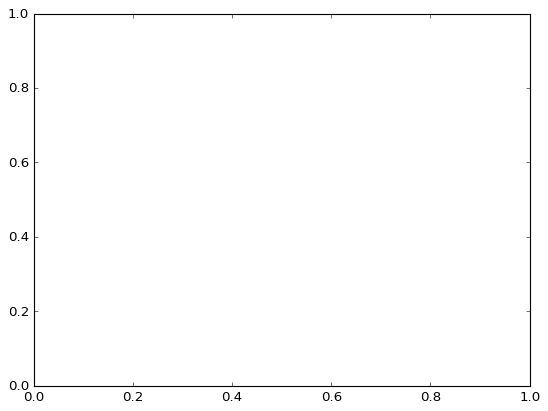

In [405]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm, ym, raw_interp)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

In [402]:
blt.interpolate_field(x, y, xm, ym, raw_y)

IndexError: too many indices for array

-------

In [ ]:
pd.read_csv('../datos/dataframes/cca/dic_dataframe_cca.csv')

In [307]:
ceilo_cca = pd.read_csv('../datos/ceilometro/ceilo_2015_local.csv', index_col=0, names=['raw', 'filt'])
ceilo_cca.index = pd.to_datetime(ceilo_cca.index)

In [312]:
new_time_rng = pd.date_range('2015-01-01 00:00:00', '2015-12-31 23:50:00', freq='10Min')

In [315]:
ceilo_cca = ceilo_cca[~ceilo_cca.index.duplicated(keep='first')]

In [318]:
ceilo_cca = ceilo_cca.reindex(new_time_rng)

In [317]:
52560/24

2190.0

In [341]:
ceilo_array = ceilo_cca['filt'].values.reshape(2190, 24).T
ceilo_array = ma.masked_where(np.isnan(ceilo_array), ceilo_array)

In [342]:
x_2 = np.linspace(1, 365, 2190)
y_2 = np.linspace(0, 23, 24)
xm_2, ym_2 = np.meshgrid(x_2, y_2)

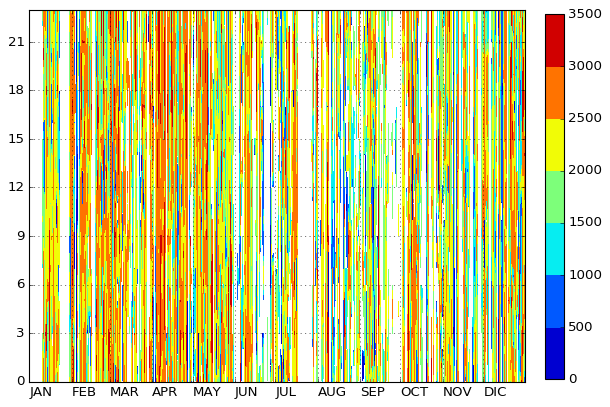

In [343]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
#ax.pcolormesh(xm, ym, Zm, shading = 'gouraud')
im = ax.contourf(xm_2, ym_2, ceilo_array)
cbar_ax = fig.add_axes([0.93, 0.13, 0.03, 0.76])
cc = fig.colorbar(im, cax=cbar_ax)
#ax.colorbar()
ax.set_xlim(1, 365)
ax.set_ylim(0, 23)
ax.set_xticks(x_ticks)
ax.set_yticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(MONTHS, ha = 'left')
ax.grid()

-----

In [36]:
m = pd.read_csv("../../validacion/datos/ceilometro/2015/cca/meses/ceilo_cca_02.csv", index_col=0, names=['raw', 'filt'])

In [49]:
m.index = pd.to_datetime(m.index)

In [55]:
m

                        raw    filt
2015-02-01 00:00:00   560.0   560.0
2015-02-01 00:10:00   550.0   550.0
2015-02-01 00:20:00   530.0   530.0
2015-02-01 00:30:00   430.0   430.0
2015-02-01 00:40:00   370.0   370.0
2015-02-01 00:50:00  1030.0  1030.0
2015-02-01 01:00:00  1060.0  1060.0
2015-02-01 01:10:00   470.0   470.0
2015-02-01 01:20:00   560.0   560.0
2015-02-01 01:30:00   560.0   560.0
2015-02-01 01:40:00   560.0   560.0
2015-02-01 01:50:00   560.0   560.0
2015-02-01 02:00:00   885.0   885.0
2015-02-01 02:10:00   880.0   880.0
2015-02-01 02:20:00  1295.0  1295.0
2015-02-01 02:30:00  1330.0  1330.0
2015-02-01 02:40:00  1330.0  1330.0
2015-02-01 02:50:00  1330.0  1330.0
2015-02-01 03:00:00  1320.0  1320.0
2015-02-01 03:10:00  1320.0  1320.0
2015-02-01 03:20:00   330.0   330.0
2015-02-01 03:30:00   360.0   360.0
2015-02-01 03:40:00   370.0   370.0
2015-02-01 03:50:00   370.0   370.0
2015-02-01 04:00:00   450.0   450.0
2015-02-01 04:10:00   450.0   450.0
2015-02-01 04:20:00  1000.0 

In [59]:
m.at_time('00:00').mean()

pandas.core.series.Series